# Problem Statement
Predicting Diabetics outcome data by traing all the dependent varaiable by a deep learning approach

In [1]:
#import all libraries
import sys
sys.version
sys.version_info
import platform
print(platform.python_version())

3.6.8


In [0]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [2]:
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

tensorflow: 1.14.0
keras: 2.2.5


Using TensorFlow backend.


In [0]:
#import all libraries
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
%matplotlib inline
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Preprocessing and EDA

In [0]:
# Import data
df = pd.read_csv('diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
type(df)
df.size
df.shape
df.head()
df.tail()

pandas.core.frame.DataFrame

6912

(768, 9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,No
764,2,122,70,27,0,36.8,0.340,27,No
765,5,121,72,23,112,26.2,0.245,30,No
766,1,126,60,0,0,30.1,0.349,47,Yes
767,1,93,70,31,0,30.4,0.315,23,No


In [10]:
print ('Overall data summary')
df.describe()
 
print ('Counts of Labels')
df.groupby("Outcome").size()

Overall data summary


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Counts of Labels


Outcome
No     500
Yes    268
dtype: int64

# One hot Encoding

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Outcome'] = le.fit_transform(df['Outcome'])

In [20]:
x = df.corr()
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


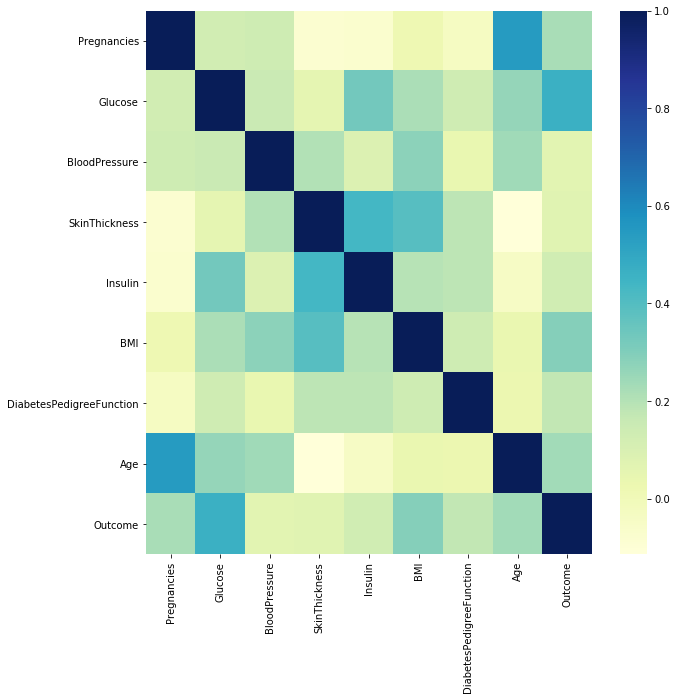

In [21]:
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap="YlGnBu")
plt.show();

# As we can see in above correlation heat map the "outcome" variable is mostly correlated with GLUCOSE and BMI and AGE with positive correlation 

# Box Plot

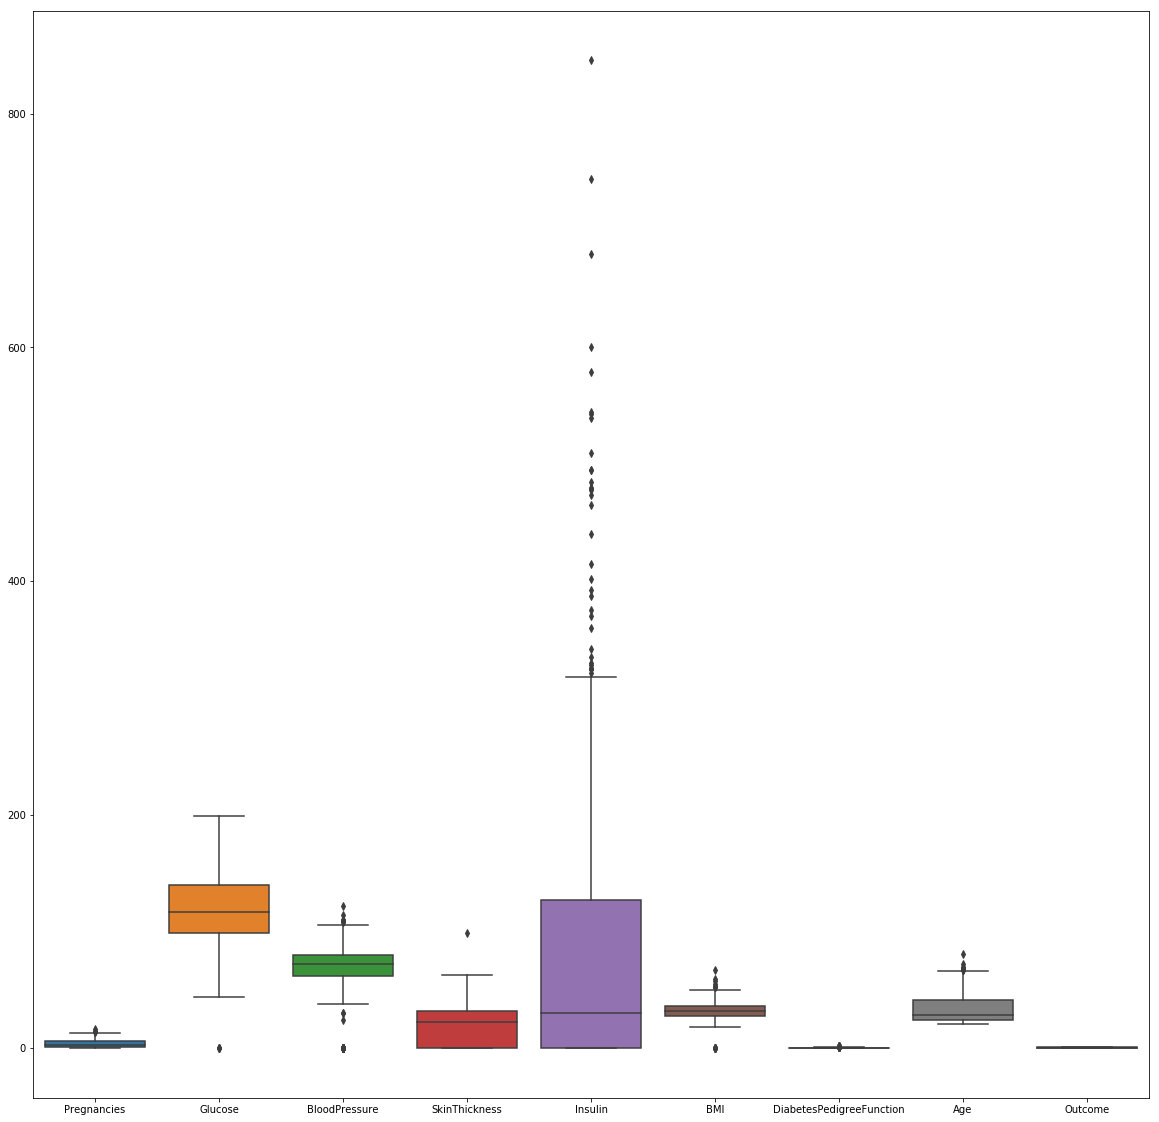

In [22]:
plt.subplots(figsize=(20,20))
sns.boxplot(data=df)
plt.show();

# Box plot gives us an identify how is the data scattering and volitalitity. and Insulin is high volitile data and Glucose give as a picture when it increases there will be high chance of getting diabetic

In [23]:
Y = df.iloc[:,8]
Y.shape

(768,)

In [24]:
X= df.iloc[:,0:8]
X.shape

(768, 8)

# Splitting data into train test split with 75% of data as train and 25% of data as test data

In [146]:
Y = df.iloc[:,8]
X= df.iloc[:,0:8]
std = StandardScaler()
X_Features= std.fit_transform(X)
# Create train and test data 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(576, 8)

(192, 8)

(576,)

(192,)

# Deep Learning Model Building a sequential mdel, so that the result of 1st trial will b the input to the next model.  We input random number for dense to see what gives us the best result since this is a black box method. We have different kinds of activation, for example relu, tanh and sigmoid. We just input different values for activation in each trial and look for best accuracy score

In [0]:
model = Sequential()
model.add(Dense(1024, input_dim =8))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(216))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
train_x = np.array(train_x)
train_y = np.array(train_y)

In [184]:
model.fit(train_x,train_y, epochs=10, batch_size=64)

Epoch 1/10
576/576 [==============================] - 4s 7ms/step - loss: 0.6201 - acc: 0.6684
Epoch 2/10
576/576 [==============================] - 0s 312us/step - loss: 0.4938 - acc: 0.7465
Epoch 3/10
576/576 [==============================] - 0s 358us/step - loss: 0.5011 - acc: 0.7448
Epoch 4/10
576/576 [==============================] - 0s 347us/step - loss: 0.4704 - acc: 0.7726
Epoch 5/10
576/576 [==============================] - 0s 335us/step - loss: 0.4645 - acc: 0.7812
Epoch 6/10
576/576 [==============================] - 0s 337us/step - loss: 0.4615 - acc: 0.7760
Epoch 7/10
576/576 [==============================] - 0s 330us/step - loss: 0.4576 - acc: 0.7917
Epoch 8/10
576/576 [==============================] - 0s 331us/step - loss: 0.4443 - acc: 0.7830
Epoch 9/10
576/576 [==============================] - 0s 336us/step - loss: 0.4256 - acc: 0.7795
Epoch 10/10
576/576 [==============================] - 0s 337us/step - loss: 0.4385 - acc: 0.8003


# Evaluate the model

In [185]:
score = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

192/192 [==============================] - 2s 9ms/step

acc: 82.81%


In [186]:
classes = model.predict_classes(test_x, batch_size=32, verbose=0)
print (classes.size)
print('Positive Cases in Test Data:', test_y[test_y == 1].shape[0])
print('Neagtive Cases in Test Data:', test_y[test_y == 0].shape[0])
print()
print()
print ('Accuracy Score')
print (metrics.accuracy_score(test_y, classes))
print()
print()
auc = metrics.roc_auc_score(test_y,classes)
print ('AUC')
print (auc)
print()
print()
print ('Precision/Recall Metrics')
print (metrics.classification_report(test_y,classes))

192
Positive Cases in Test Data: 69
Neagtive Cases in Test Data: 123


Accuracy Score
0.828125


AUC
0.8085896076352067


Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       123
           1       0.77      0.74      0.76        69

    accuracy                           0.83       192
   macro avg       0.81      0.81      0.81       192
weighted avg       0.83      0.83      0.83       192



# F1 score tells harmonic meaning of both precision and recall and it is pretty good in identifying Non diabetic patients with 87 %  accuaracy and in identifying Diabetic patient it is giving 76 % accurate

# The Accuracy of Model is 82.8 %

# ROC Curve

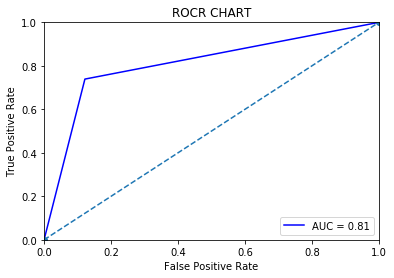

In [187]:
# ROC Chart
fpr, tpr, th= roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

# Auc Value = 81 %

Confusion Matrix


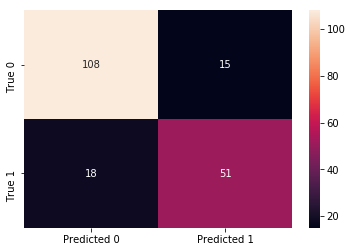

In [188]:
print ('Confusion Matrix')
cf=  metrics.confusion_matrix(test_y,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();

# Insights

# Here our model is aim to identify the diabetics patient from their different health vitals. and the model was able to identify 51 patient (true positive) and 18 patient categorized wrongly and classified as non diabetic patients.

# Althogh in Identifying Non diabetic patients model does a good job and 108 Patient identified as True Negative and classified correctly and 15  patients wrongly classifyied as diabetic patient.